## with iris' petal_length data, using linear_linear_regression to predict petal_width 

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import data

In [2]:
df1 = pd.read_csv("iris_data.csv")
df1[["petal_length","petal_width"]].head(10)

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


In [3]:
# y = w*x + b

x = df1["petal_length"]
y = df1["petal_width"]

# data plot visualization

In [4]:
def draw_multi_plot(w,b,i,j):
    y2 = w*x + b
    ax[i][j].plot(x,y2, color="r")
    # ax[i][j].set_xlim([0,8])
    # ax[i][j].set_ylim([0,2.75])
    ax[i][j].scatter(x,y, color = "b")
    ax[i][j].set_title("w=%.1f & b=%.1f" %(w,b))
    

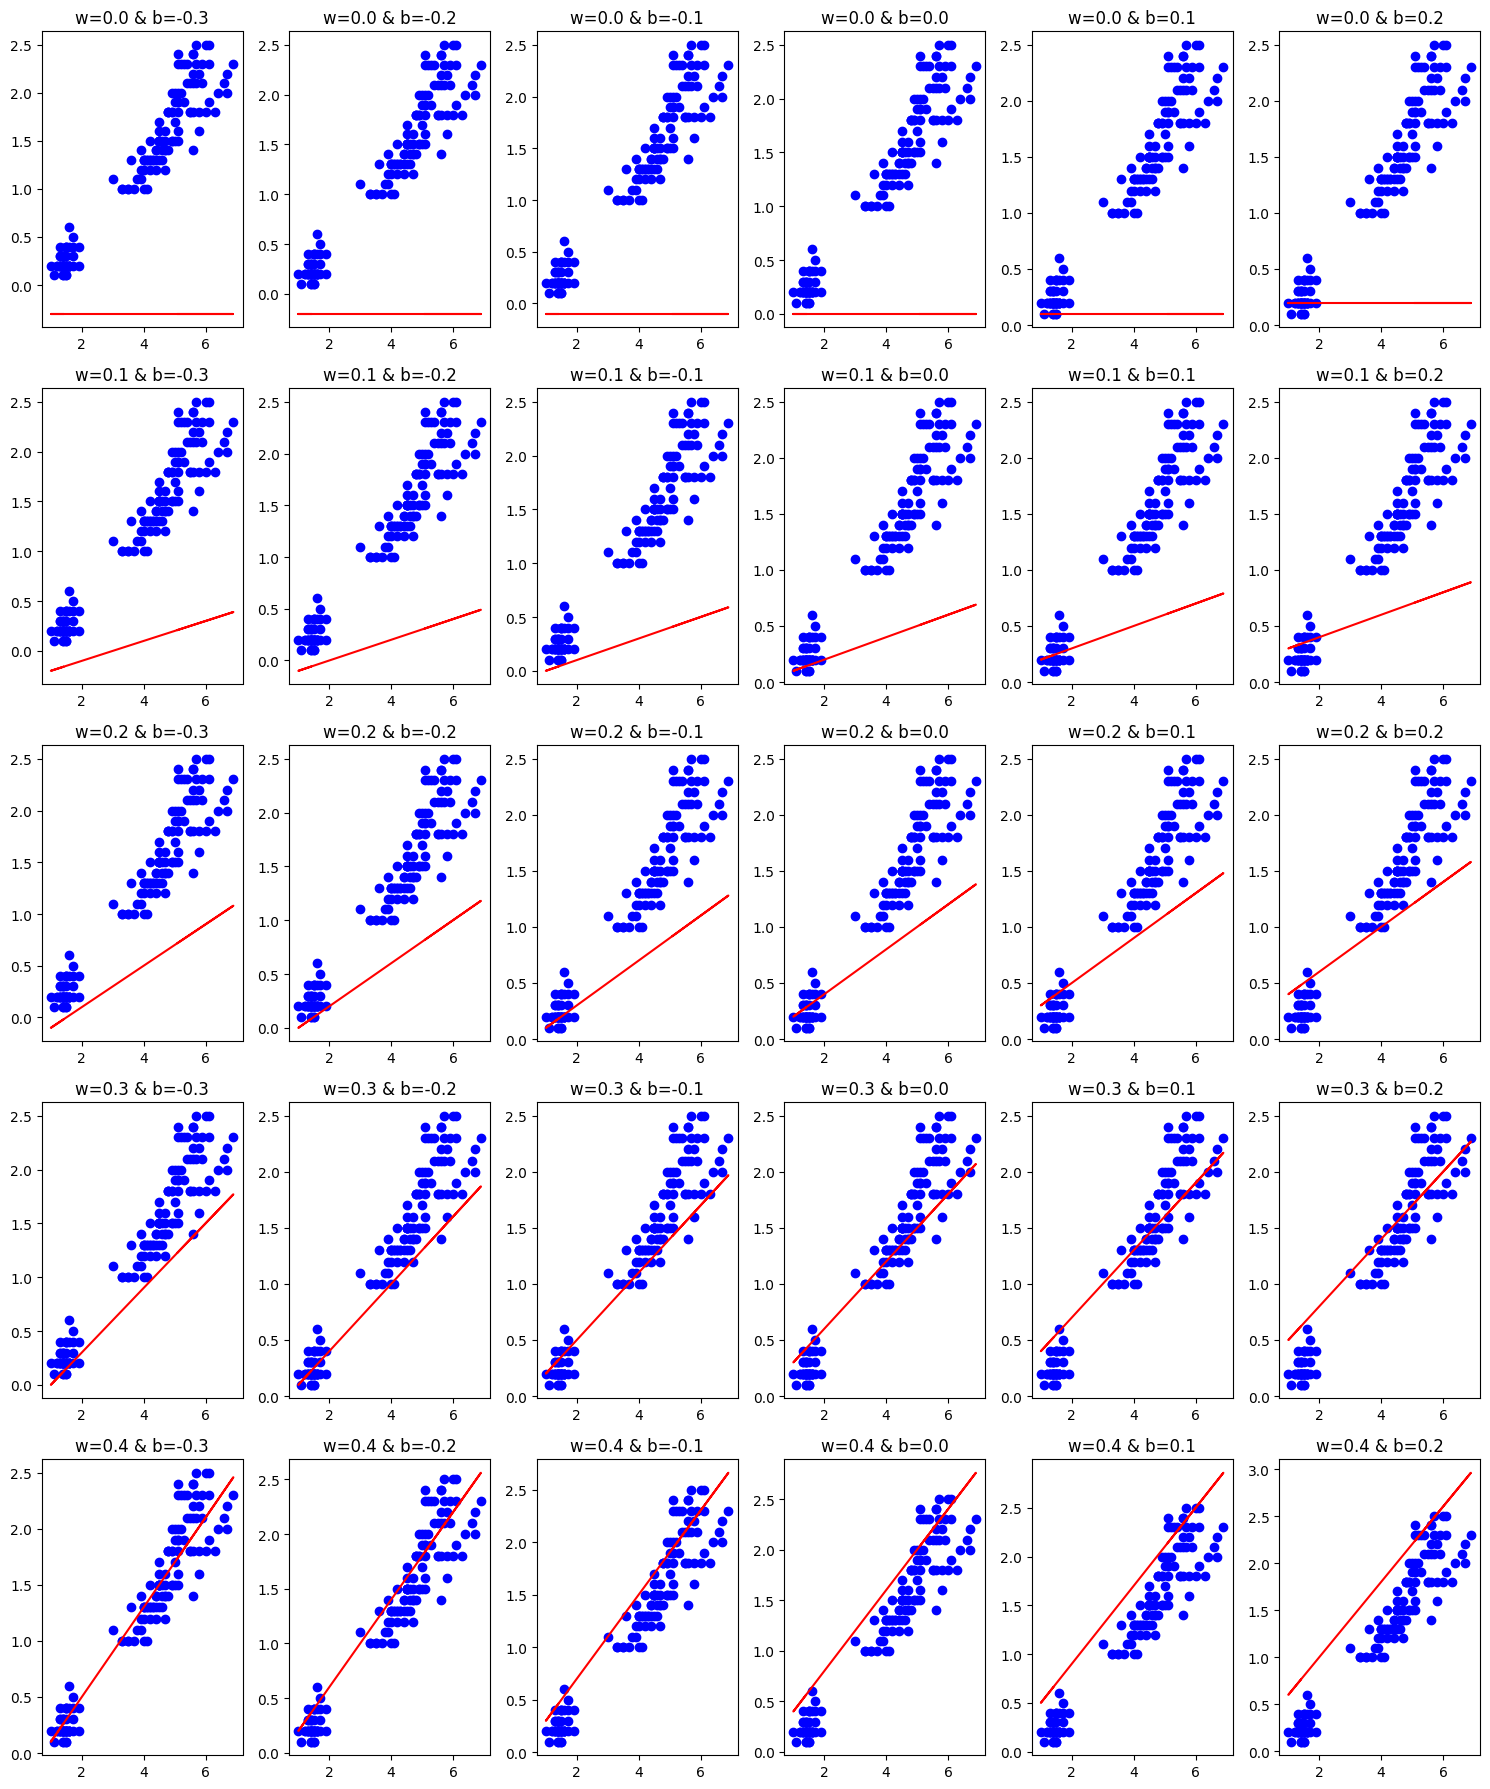

In [5]:
fig,ax = plt.subplots(5,6,figsize = (15,18))

w = np.arange(0,0.5,0.1)
b = np.arange(-0.3,0.3,0.1)
for i in range(len(w)):
    for j in range(len(b)):
        draw_multi_plot(w[i],b[j],i,j)
fig.tight_layout()
plt.show()

# cost function

In [6]:
# y = w*x + b
# df_cleaned = df1.dropna(subset=["petal_length", "petal_width"])
x = df1["petal_length"]
y = df1["petal_width"]


In [7]:
def compute_cost(x,y,w,b):
    y_pred2 = w*x + b 
    cost = (y-y_pred2)**2
    cost = cost.mean()
    return cost

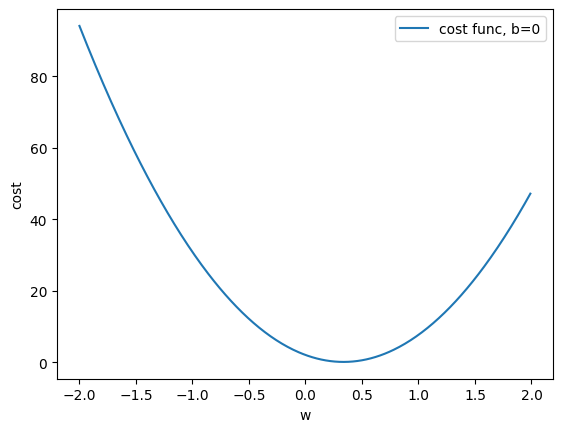

In [8]:
#loop w while b=0:

costs = []

# w = np.arange(-5,5,0.01)
for w in np.arange(-2,2,0.01):
    cost = compute_cost(x,y,w,0)
    costs.append(cost)

# plt.scatter(np.arange(-2,2,0.01),costs)
plt.plot(np.arange(-2,2,0.01),costs,label = "cost func, b=0")
plt.xlabel("w")
plt.ylabel("cost")
plt.legend()
plt.show()

In [9]:
#loop both w and b: 

costs = []


ws = np.arange(-1,1,0.01)
bs = np.arange(-1,1,0.01)
costs = np.zeros((200,200))

for i in range(len(ws)):
    for j in range(len(bs)):
        cost = compute_cost(x,y,ws[i],bs[j])
        costs[i,j]=cost
        j+=1
    i+=1
costs 

array([[41.7364    , 41.61735333, 41.49850667, ..., 22.14540667,
        22.06576   , 21.98631333],
       [41.20271914, 41.08442407, 40.96632901, ..., 21.75979101,
        21.68089594, 21.60220087],
       [40.67248189, 40.55493843, 40.43759496, ..., 21.37761896,
        21.29947549, 21.22153203],
       ...,
       [ 3.08366959,  3.11268813,  3.14190666, ..., 12.66152066,
        12.72993919, 12.79855773],
       [ 3.22838056,  3.25815069,  3.28812083, ..., 12.95429683,
        13.02346696, 13.09283709],
       [ 3.37653514,  3.40705687,  3.43777861, ..., 13.25051661,
        13.32043834, 13.39056007]], shape=(200, 200))

when cost is smallest, w: [0.42], b: [-0.38]


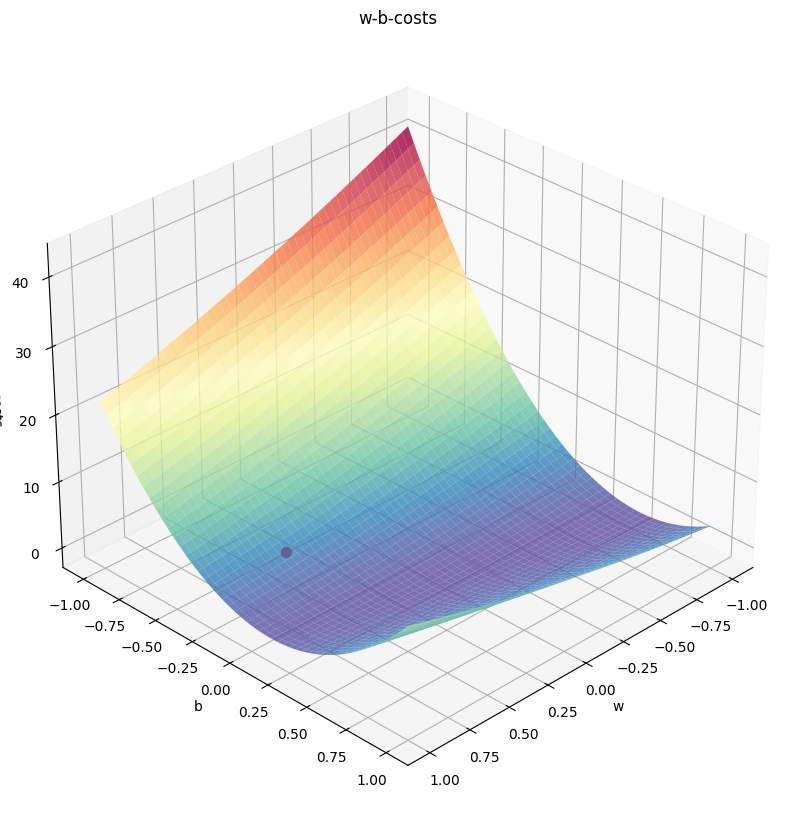

In [10]:
plt.figure(figsize = (10,12))
ax = plt.axes(projection = "3d")
ax.view_init(30,45)
w_grid,b_grid = np.meshgrid(ws,bs)
ax.plot_surface(w_grid, b_grid,costs, cmap="Spectral_r", alpha=0.8) #cmap = "plasma" 
# ax.plot_surface(w_grid, b_grid,costs, cmap="plasma", alpha=0.6)
ax.set_title("w-b-costs")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("costs")

# print(np.min(costs))
w_index,b_index = np.where(costs == np.min(costs))
print(f"when cost is smallest, w: {ws[w_index]}, b: {bs[b_index]}")

ax.scatter(ws[w_index],bs[b_index],costs[w_index,b_index],color="r", s=50)

# ax.text(ws[w_index],bs[b_index],costs[w_index,b_index],"Min Cost",zorder = 1, color = "black")


plt.savefig("w-b-cost_3D.png")

plt.show()

# linear Gradient descent

In [11]:
# df_cleaned = df1.dropna(subset=["petal_length", "petal_width"])
x = df1["petal_length"]
y = df1["petal_width"]
# y_pred = w*x + b
# cost = (y_pred - y)**2
# cost = (w*x + b - y)**2
def compute_gradient(x,y,w,b):

    w_gradient = (2*x*(w*x+b-y)).mean()
    b_gradient = (2*(w*x+b-y)).mean()
    
    return w_gradient, b_gradient

def compute_cost(x,y,w,b):
    y_pred2 = w*x + b 
    cost = (y-y_pred2)**2
    cost = cost.mean()
    return cost

In [12]:
compute_gradient(x,y,0.5,0.5)

(np.float64(9.387933333333335), np.float64(2.3593333333333333))

In [13]:


def gradient_descent(x,y,w_init,b_init,run_iter,print_iter,learning_rate):
    w = w_init
    b = b_init
    
    cost_hist = []
    w_hist = []
    b_hist = []

    for i in range(run_iter): 
        
        w_gradient, b_gradient = compute_gradient(x,y,w,b)
        
        w = w-w_gradient*learning_rate 
        b = b-b_gradient*learning_rate 
        cost = compute_cost(x,y,w,b)
        cost_hist.append(cost)
        w_hist.append(w)
        b_hist.append(b)
        
        if i%print_iter == 0:
            print(f"iteration {i:4} showed cost: {cost:8.4f},  w:{w:8.4f},  b:{b:8.4f},  w_gradient:{w_gradient:8.4f},  b_gradient:{b_gradient:8.4f}")
    return w,b,w_hist, b_hist, cost_hist 

In [14]:
w_init=1
b_init=1
learning_rate=0.0025
run_iter = 10001
print_iter = 500

w_final, b_final, w_hist, b_hist, cost_hist = gradient_descent(x,y,w_init,b_init,run_iter,print_iter,learning_rate)


iteration    0 showed cost:  11.4409,  w:  0.9241,  b:  0.9822,  w_gradient: 30.3640,  b_gradient:  7.1173
iteration  500 showed cost:   0.1475,  w:  0.2469,  b:  0.4027,  w_gradient: -0.0580,  b_gradient:  0.2629
iteration 1000 showed cost:   0.0868,  w:  0.3058,  b:  0.1356,  w_gradient: -0.0377,  b_gradient:  0.1712
iteration 1500 showed cost:   0.0610,  w:  0.3442,  b: -0.0384,  w_gradient: -0.0246,  b_gradient:  0.1115
iteration 2000 showed cost:   0.0501,  w:  0.3691,  b: -0.1516,  w_gradient: -0.0160,  b_gradient:  0.0726
iteration 2500 showed cost:   0.0455,  w:  0.3854,  b: -0.2254,  w_gradient: -0.0104,  b_gradient:  0.0473
iteration 3000 showed cost:   0.0435,  w:  0.3960,  b: -0.2734,  w_gradient: -0.0068,  b_gradient:  0.0308
iteration 3500 showed cost:   0.0427,  w:  0.4029,  b: -0.3047,  w_gradient: -0.0044,  b_gradient:  0.0200
iteration 4000 showed cost:   0.0423,  w:  0.4074,  b: -0.3251,  w_gradient: -0.0029,  b_gradient:  0.0131
iteration 4500 showed cost:   0.0422,

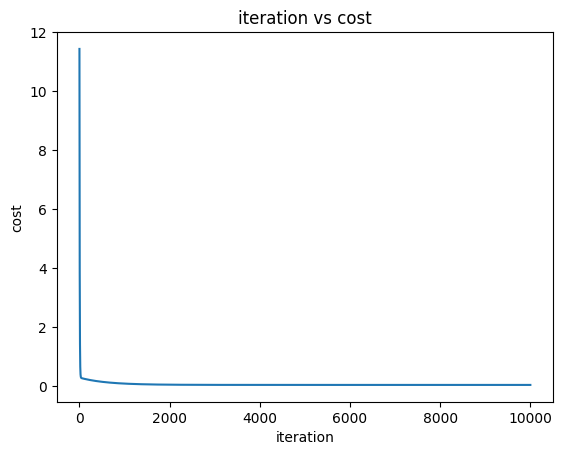

In [15]:
plt.plot(np.arange(0,10001),cost_hist)
plt.title("iteration vs cost")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

In [16]:
print(w_final, b_final)

0.41570672528485175 -0.3628546554003639


In [17]:
#specific examples - to test 

z1 = w_final*7 + b_final


print(z1)

2.5470924215935984


In [18]:
ws = np.arange(-1,1,0.01)
bs = np.arange(-1,1,0.01)
costs = np.zeros((200,200))

for i in range(len(ws)):
    for j in range(len(bs)):
        cost = compute_cost(x,y,ws[i],bs[j])
        costs[i,j]=cost
        j+=1
    i+=1

when cost is smallest, w: [0.42], b: [-0.38]


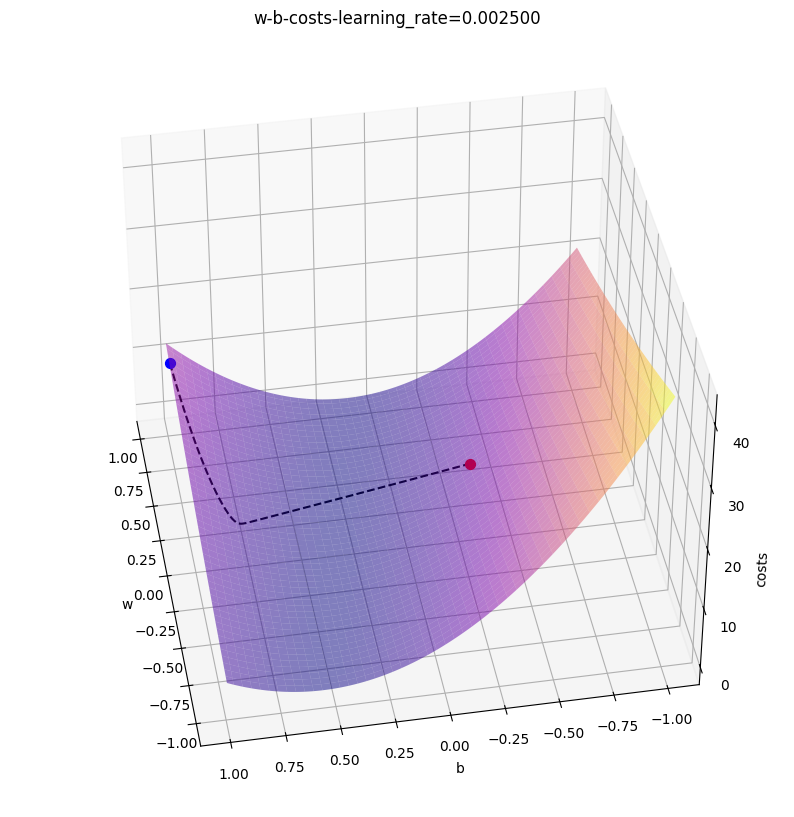

In [19]:
plt.figure(figsize = (10,12))
ax = plt.axes(projection = "3d")
ax.view_init(40,170)

w_grid,b_grid = np.meshgrid(ws,bs)
ax.plot_surface(w_grid, b_grid,costs, cmap="plasma", alpha=0.5) 
ax.set_title("w-b-costs-learning_rate=%f"%(learning_rate))
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("costs")

# print(np.min(costs))
w_index,b_index = np.where(costs == np.min(costs))
print(f"when cost is smallest, w: {ws[w_index]}, b: {bs[b_index]}")

ax.scatter(ws[w_index],bs[b_index],costs[w_index,b_index],color="r", s=50)
ax.plot(w_hist, b_hist, cost_hist, linestyle = "--", color="k")
ax.scatter(w_hist[0],b_hist[0],cost_hist[0],color="b", s=50)


# plt.savefig("w-b-cost_3D.png")

plt.show()